# UDACITY data analyst Nanodegree program

# Project 1: Data analysis TMDb movie data
------

This data set contains informationabout 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime.

## Table of Contents
------
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#ITD">1. Inspecting the dataframe</a></li>
    <li><a href="#CTD">2. Cleaning the dataframe</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#eda">1.General questions</a></li>
        <li><a href="#eda">.Question 1 : Movies with 120 or more runtimes(2hours and more) </a></li>
        <li><a href="#eda">.Question 2 : Year with the highest vote average </a></li>
        <li><a href="#eda">.Question 3 : Year with the highest revenue average </a></li>
        <li><a href="#eda">.Question 4 : What is the average runtime of the movies in the TMDb dataset? </a></li>
        <li><a href="#eda">.How many movie did we have per year?</a></li>
    <li><a href="#eda">2.Question 2 : Which genres are most popular from year to year?  </a></li>
<li><a href="#conclu">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
------

> I will use the TMDb movie data and i'll go through the data analysis process from data wrangling to analysis and making conclusions using Pandas ,Numpy and others python package that make data analysis much easier.
>
>The TMDb dataset is a dataset about movies and tv shows that contains information about a movie like  'title' ,'revenue', 'director' , 'runtime' etc
>This data was provided as part of the Udacity Data Analysis Nanodegree and originated from [kaggle](https://www.kaggle.com).
#### Questions
------------

1. 
2. Which genres are most popular from year to year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<a id='ITD'></a>
### 1. Inspecting the dataframe

#### A. Frist 10 Rows of the dataset

In [2]:
#reading the dataset 
tmdbmovie_data = pd.read_csv("tmdb-movies.csv")
#Display the first 10 rows of the dataset
tmdbmovie_data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

#### B. Last 10 Rows of the dataset

In [3]:
# display the 10 last rows of the dataset
tmdbmovie_data.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


#### C. Find number of Rows and number of columns of the dataset

In [4]:
tmdbmovie_data.shape
print("Number of rows:",tmdbmovie_data .shape[0])
print("Number of columns:",tmdbmovie_data .shape[1])

Number of rows: 10866
Number of columns: 21


#### D. Information about the TMDb Dataset

In [5]:
tmdbmovie_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
tmdbmovie_data.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [7]:
tmdbmovie_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
tmdbmovie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
#Making a copy of the dataset before any modification
tmdbmovie_data_copy=tmdbmovie_data.copy()

<a id='CTD'></a>
### 2. Cleaning the dataframe

#### A. Missing Values in the dataset

In [10]:
tmdbmovie_data_copy.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

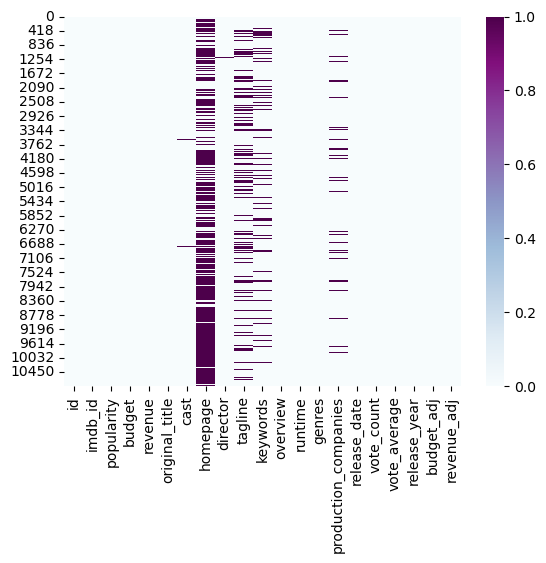

In [11]:
# heatmap that show the columns with missing values
sns.heatmap(tmdbmovie_data_copy.isnull(),cmap="BuPu");

>The columns 'imdb_id','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies' are the one that have missing values.I choose to drop all the columns that have missing values except for the genres column.

> 
>I also decided to delete the 'budget' and the 'revenue' column from the dataset since there is already the 'budget_adj'and the 'revenue_adj' that show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime.

In [12]:
tmdbmovie_data_copy.drop(['imdb_id','budget','revenue','cast', 'homepage','director', 'tagline', 'keywords','overview','production_companies'], axis=1, inplace=True)


In [13]:
tmdbmovie_data_copy.isnull().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
tmdbmovie_data_copy.dropna(subset=['genres'],inplace=True)

In [15]:
tmdbmovie_data_copy.isnull().sum()

id                0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [16]:
#lets check the dataset after deleting the NaN and the columns listed above
tmdbmovie_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   original_title  10843 non-null  object 
 3   runtime         10843 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10843 non-null  object 
 6   vote_count      10843 non-null  int64  
 7   vote_average    10843 non-null  float64
 8   release_year    10843 non-null  int64  
 9   budget_adj      10843 non-null  float64
 10  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1016.5+ KB


#### B. Duplicates in the dataset


In [17]:
# check for duplicates in the data
sum(tmdbmovie_data_copy.duplicated())

1

there is one duplicated entry let's look at the duplicates

In [18]:
#Displaying the duplicated rows
tmdbmovie_data_copy[tmdbmovie_data_copy.duplicated(keep=False)]

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


now that i have the duplicated rows i will drop it from the dataframe

In [19]:
# drop duplicates
tmdbmovie_data_copy.drop_duplicates(inplace=True)

In [20]:
# confirm correction by rechecking for duplicates in the data
sum(tmdbmovie_data_copy.duplicated())

0

In [21]:
tmdbmovie_data_copy.shape

(10842, 11)

There is 10842 entries and 11 columns .Since a movie cannot have a budget, revenue or runtime that equal to zero. Let's check the number of entries that have at least zero in one of these columns.

In [22]:
(tmdbmovie_data_copy['runtime'] == 0).sum()

30

In [23]:
(tmdbmovie_data_copy['revenue_adj'] == 0).sum()

5993

In [24]:
(tmdbmovie_data_copy['budget_adj'] == 0).sum()

5674

There is more than half of the dataset that have 0 in the revenue and budget rows. so when we'll have to use these columns we are going work with a dataset without these entries (delete them)

In [25]:
tmdbmovie_data_copy

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [26]:
#Checking the datatypes 
tmdbmovie_data_copy.dtypes

id                  int64
popularity        float64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

The release_date has Object as Datatype.But since it's a date we have to convert the datatype to datetime

In [27]:
tmdbmovie_data_copy['release_date'] = pd.to_datetime(tmdbmovie_data_copy['release_date'])
tmdbmovie_data_copy.head(5)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



# 1. General questions

### Movies with 120 or more runtimes(2hours and more)

In [28]:
movie_runtime=tmdbmovie_data_copy[tmdbmovie_data_copy['runtime']>=120]['original_title']
movie_runtime

0                                          Jurassic World
1                                      Mad Max: Fury Road
3                            Star Wars: The Force Awakens
4                                               Furious 7
5                                            The Revenant
                               ...                       
10850                                              Harper
10854                                           The Chase
10857                                        Nevada Smith
10858    The Russians Are Coming, The Russians Are Coming
10862                                          Grand Prix
Name: original_title, Length: 1718, dtype: object

In [29]:
movie_runtime.count()

1718

There's 1718 movies with 2hours or more of runtime.

### Year with the highest vote average

In [30]:
#tmdbmovie_data_copy.columns
tmdbmovie_data_copy.groupby('release_year')['vote_average'].mean().sort_values(ascending=False)

release_year
1973    6.703636
1972    6.535000
1970    6.502500
1974    6.426087
1971    6.420000
1975    6.390909
1968    6.379487
1961    6.374194
1962    6.343750
1976    6.340426
1963    6.329412
1960    6.325000
1979    6.308772
1967    6.242500
1982    6.241975
1964    6.211905
1965    6.194286
1985    6.177064
1981    6.165854
1980    6.160256
1977    6.147368
1978    6.130769
1987    6.128800
1966    6.128261
1992    6.081203
1989    6.075735
1995    6.052299
1993    6.050000
1999    6.032589
1991    6.014286
1986    6.004959
1984    6.003810
1990    5.993939
2010    5.989733
2004    5.988599
1997    5.988542
2002    5.973308
1983    5.971250
1998    5.970476
1988    5.965517
2007    5.964384
1969    5.961290
2011    5.958519
1994    5.942391
2006    5.941422
2003    5.930961
2008    5.930505
2014    5.919456
1996    5.897044
2001    5.890871
2015    5.886762
2000    5.884513
2013    5.875000
2005    5.866391
2009    5.851601
2012    5.789384
Name: vote_average, dtype: float64

we are going to visualise it into a barplot to see the vote average per year

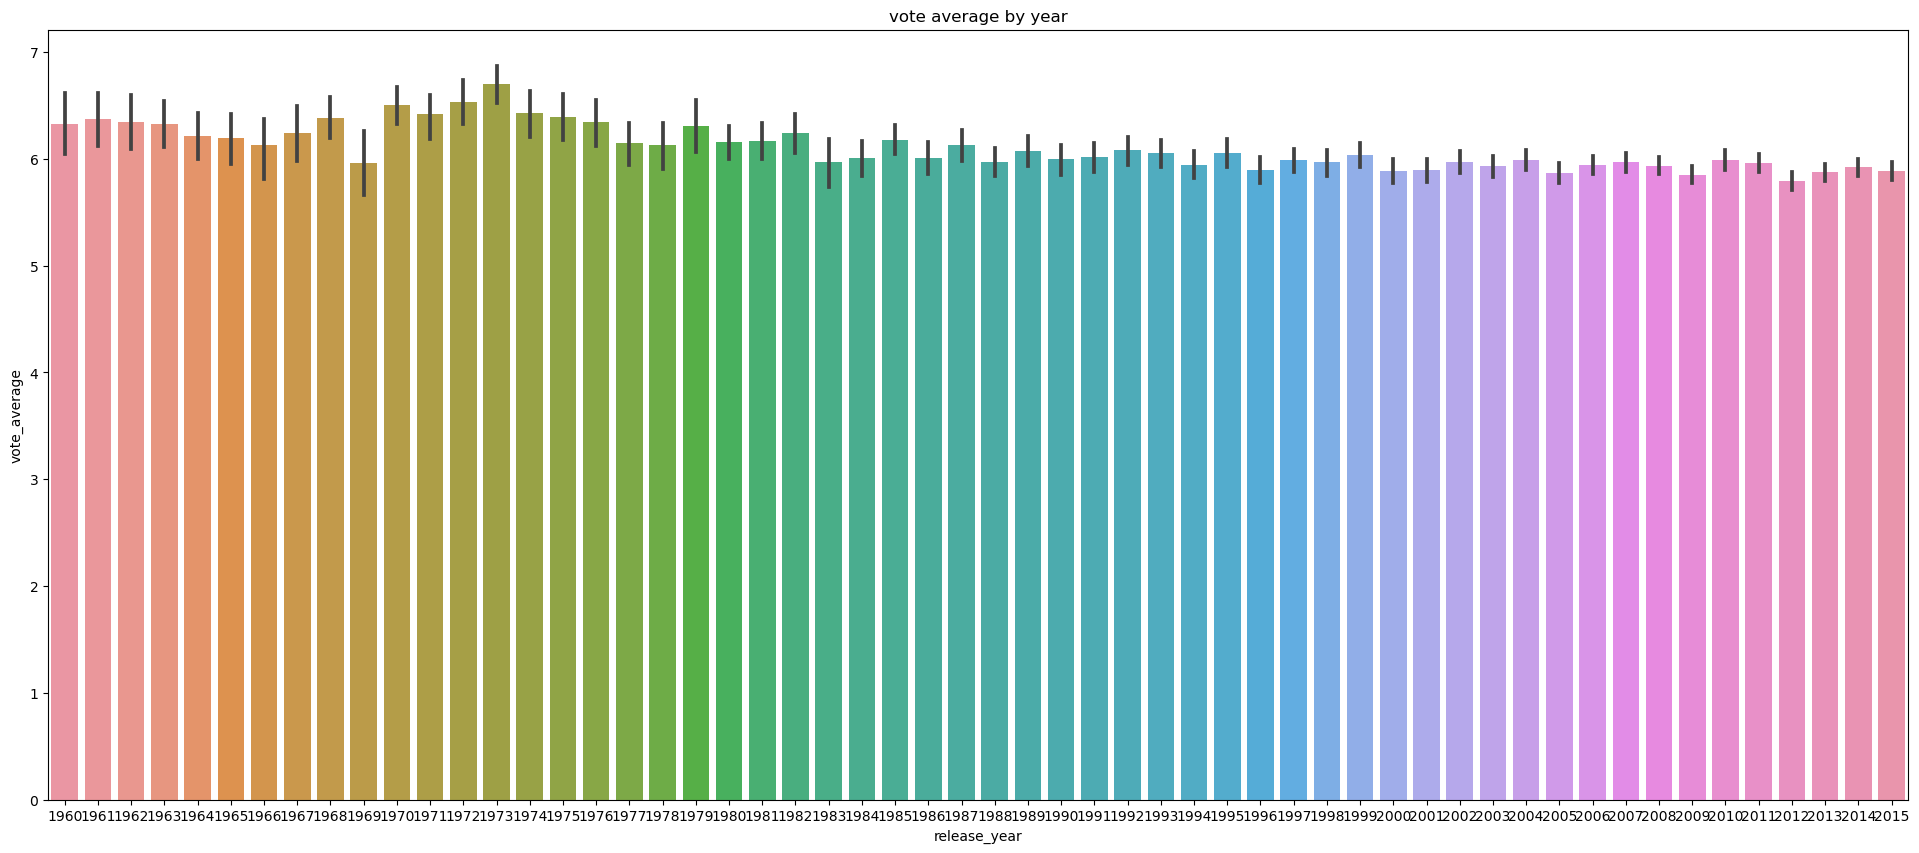

In [31]:
plt.rcParams['figure.figsize']=(24,10)
g=sns.barplot(x='release_year',y='vote_average',data=tmdbmovie_data_copy)
plt.title("vote average by year")
plt.show()

The year with the highest vote average is in 1973

### In which year there was a highest average revenue?

In [32]:
tmdbmovie_data_copy.groupby('release_year')['revenue_adj'].mean().sort_values(ascending=False)

release_year
1977    1.376362e+08
1967    1.205763e+08
1973    1.092939e+08
1965    9.057670e+07
1979    8.880802e+07
1975    8.817223e+07
1961    7.947167e+07
1970    7.866032e+07
1974    7.811482e+07
1997    7.538870e+07
1995    7.530127e+07
1992    7.101953e+07
1978    7.044251e+07
1982    6.858277e+07
2001    6.852431e+07
1990    6.720056e+07
1989    6.680164e+07
2002    6.673644e+07
1999    6.636262e+07
1976    6.530237e+07
1972    6.449502e+07
2003    6.385821e+07
2004    6.315163e+07
1983    6.314877e+07
2000    6.151435e+07
1998    6.047132e+07
1980    5.999930e+07
1993    5.898085e+07
1964    5.707603e+07
1996    5.692008e+07
1994    5.672917e+07
1991    5.665942e+07
1985    5.348319e+07
1987    5.315246e+07
1984    5.268644e+07
1981    5.190054e+07
2005    5.080466e+07
1986    4.936980e+07
1962    4.856238e+07
1988    4.755396e+07
1969    4.677888e+07
2007    4.660877e+07
2010    4.509041e+07
2006    4.314942e+07
1968    4.255388e+07
2011    4.253789e+07
2009    4.245562e+07


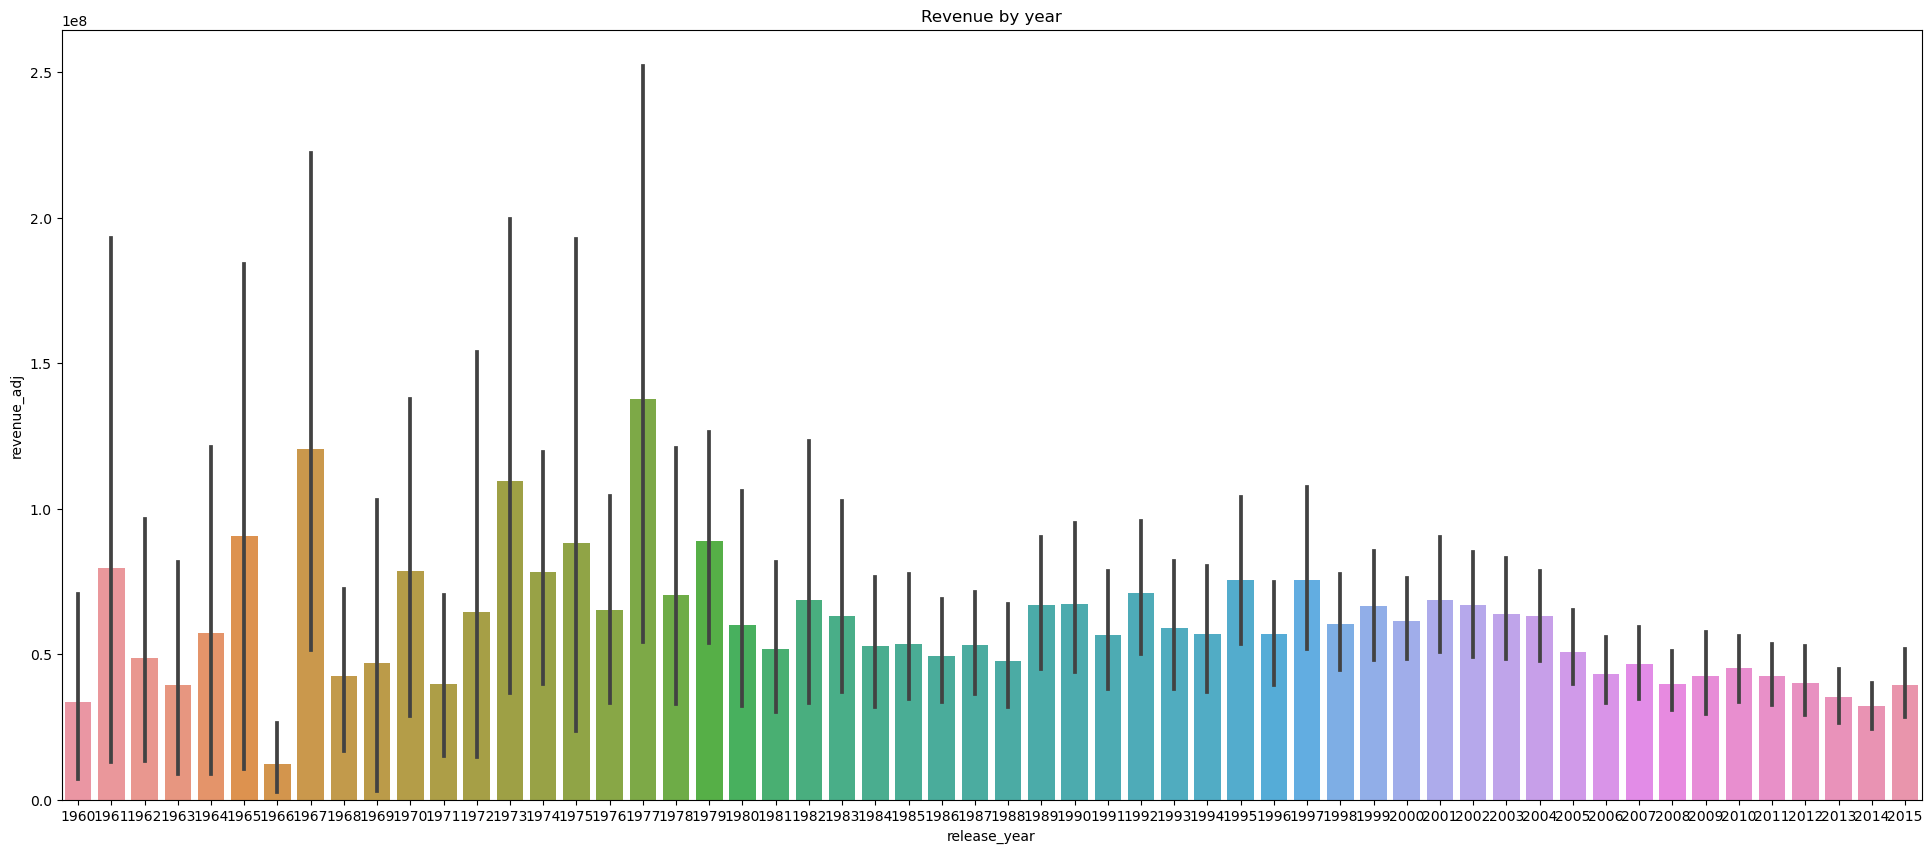

In [33]:
plt.rcParams['figure.figsize']=(24,10)
g=sns.barplot(x='release_year',y='revenue_adj',data=tmdbmovie_data_copy)
plt.title("Revenue by year")
plt.show()

The year with the highest average revenue is in 1977. which can be suprizing because we tend to think that the movies are the most expensives one due to the method of work and the cost of new technologies.

### What is the average runtime of the movies in the TMDb dataset?

In [34]:
movie_mean_runtime = tmdbmovie_data_copy['runtime'].mean()
movie_mean_runtime

102.1384430916805

The average runtime of all movies in this dataset is 102 minutes.

### How many movie did we have per year?

In [35]:
tmdbmovie_data_copy['release_year'].value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     46
1966     46
1975     44
1964     42
1967     40
1970     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

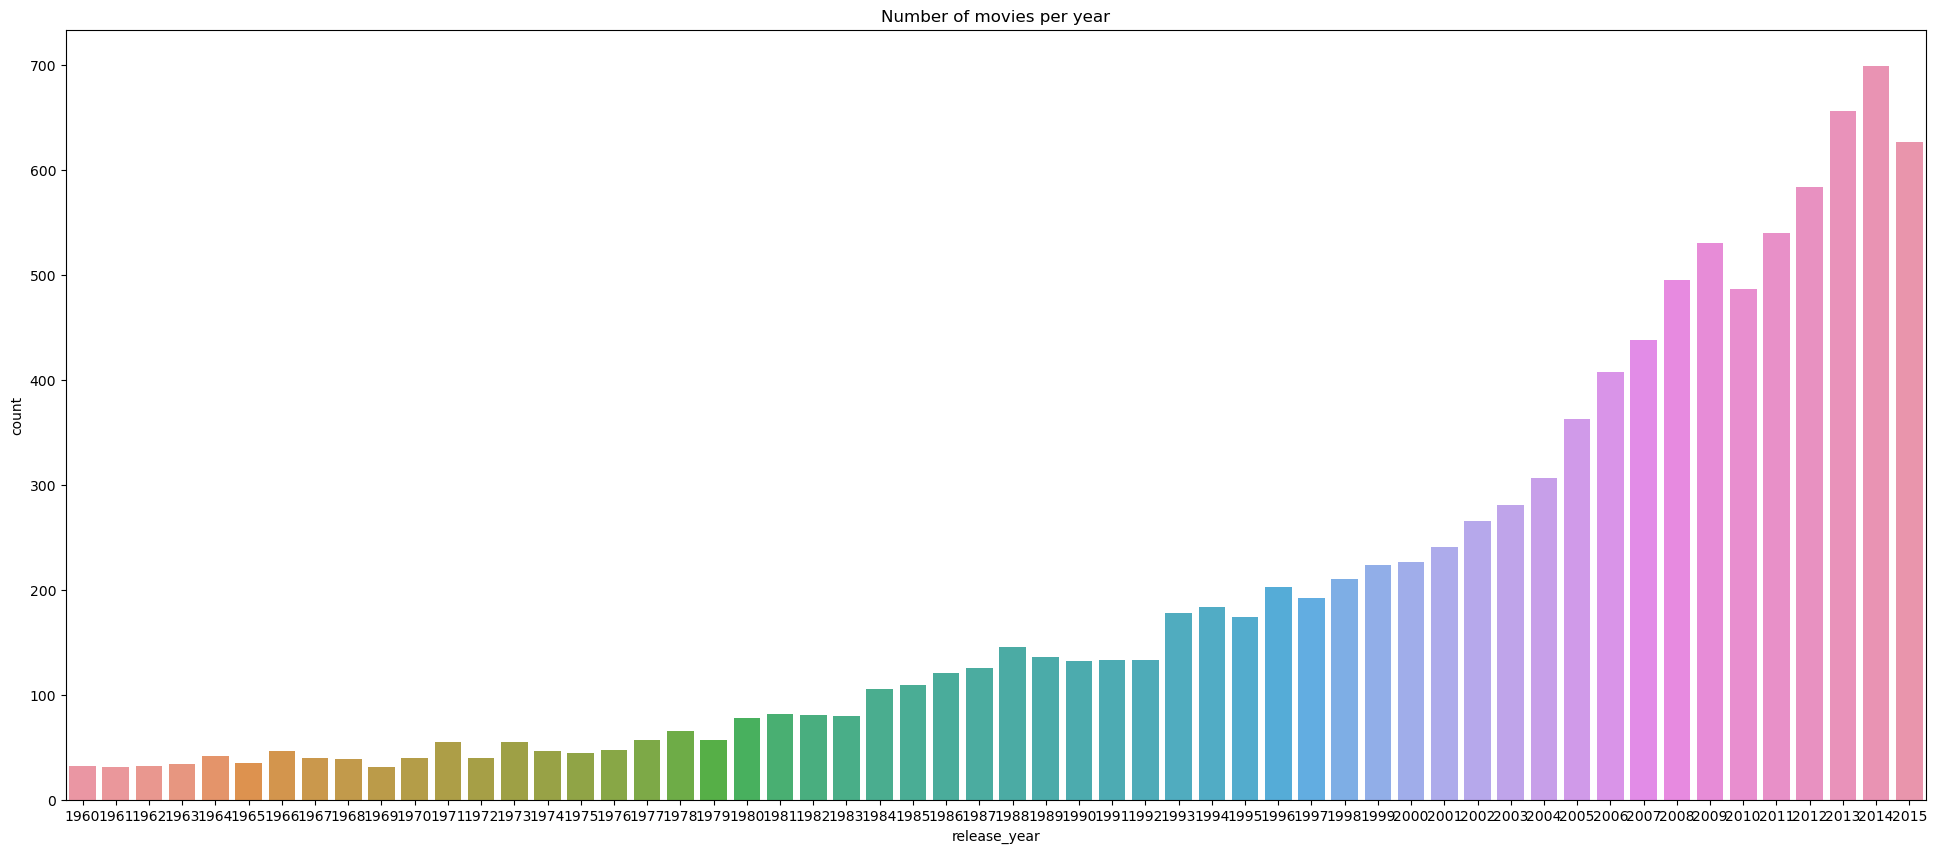

In [36]:
sns.countplot(x='release_year',data=tmdbmovie_data_copy)
plt.title("Number of movies per year")
plt.rcParams['figure.figsize']=(24,10)
plt.show()

### 2. Question 2 : Which genres are most popular from year to year? 

In [37]:
#Display the id, the movie title ,the release year and the genre

tmdbmovie_new= tmdbmovie_data_copy.loc[:,['id','original_title','genres','release_year','popularity']]
tmdbmovie_new.head(10)

,id,original_title,genres,release_year,popularity
0,135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,32.985763
1,76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,28.419936
2,262500,Insurgent,Adventure|Science Fiction|Thriller,2015,13.112507
3,140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,11.173104
4,168259,Furious 7,Action|Crime|Thriller,2015,9.335014
5,281957,The Revenant,Western|Drama|Adventure|Thriller,2015,9.110700
6,87101,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2015,8.654359
7,286217,The Martian,Drama|Adventure|Science Fiction,2015,7.667400
8,211672,Minions,Family|Animation|Adventure|Comedy,2015,7.404165
9,150540,Inside Out,Comedy|Animation|Family,2015,6.326804


In [38]:
def clean_column(column,df=tmdbmovie_new):
    """ this function cleans columns by getting rid of whitespace and hyphens and replace it by underscore
    @param column:a series object of strings in df
    @param df:a pandas dataframe
    """
    df[column]=df[column].str.replace(' ','_').replace('-','_').str.lower()

In [39]:
#Apply it to the genres columns
clean_column('genres')

In [40]:
tmdbmovie_new.genres.head()

0    action|adventure|science_fiction|thriller
1    action|adventure|science_fiction|thriller
2           adventure|science_fiction|thriller
3     action|adventure|science_fiction|fantasy
4                        action|crime|thriller
Name: genres, dtype: object

In [41]:
tmdbmovie_new['genres']=tmdbmovie_new['genres'].str.split('|')
tmdbmovie_new = tmdbmovie_new.explode('genres')

In [42]:
tmdbmovie_new.head(5)

,id,original_title,genres,release_year,popularity
0,135397,Jurassic World,action,2015,32.985763
0,135397,Jurassic World,adventure,2015,32.985763
0,135397,Jurassic World,science_fiction,2015,32.985763
0,135397,Jurassic World,thriller,2015,32.985763
1,76341,Mad Max: Fury Road,action,2015,28.419936


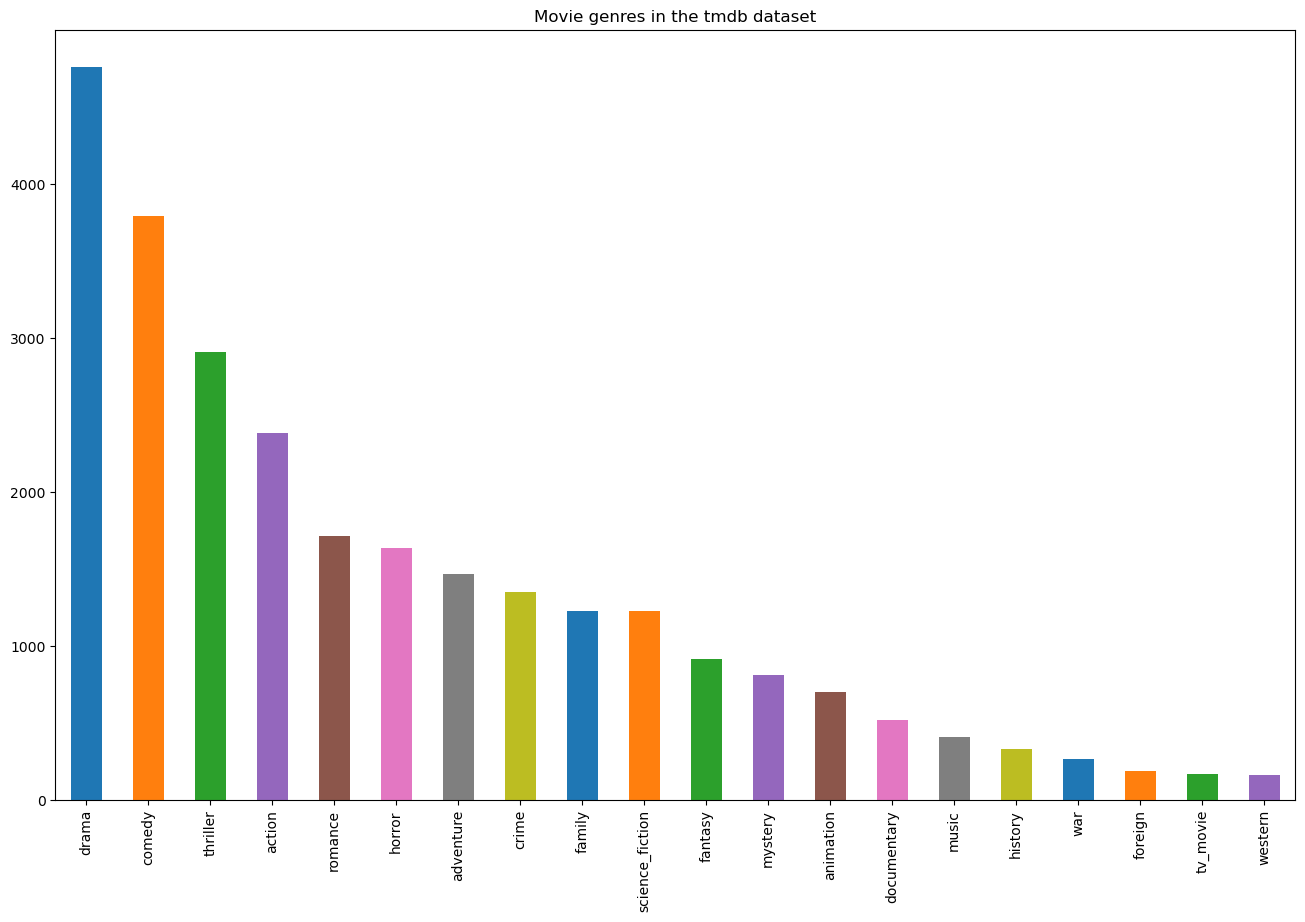

In [43]:
tmdbmovie_new['genres'].value_counts().plot(kind='bar', figsize=(16,10),color=['C0', 'C1', 'C2','C4','C5', 'C6', 'C7','C8'],title = 'Movie genres in the tmdb dataset');

From the chart above we can see that the drama genre is the one that has the most films followed by the comedy genre then thriller and the genre that has the least films is the western genre

In [44]:
x = tmdbmovie_new.groupby(['release_year','genres']).sum()['popularity']
y=x.to_frame()
y

popularity
release_year genres                     
1960         action             4.725796
             adventure          3.504904
             comedy             3.168003
             crime              0.692959
             drama              7.361967
...                                  ...
2015         science_fiction  193.121886
             thriller         239.720907
             tv_movie           5.211474
             war               11.560600
             western           19.072777

[1049 rows x 1 columns]

In [45]:
#Retreive the genres that has the highest popularity in 1961
idmax = y.groupby("release_year").get_group(1961).idxmax()
idmax

popularity    (1961, drama)
dtype: object

In [46]:
max_values =y.groupby("release_year").get_group(1961).max()
max_values.values

array([6.915731])

In [47]:
#list of the differents years in the dataset
tmdbmovie_new['release_year'].unique()
w = sorted(tmdbmovie_new['release_year'].unique())

In [48]:
def new_frame(annual_list, df):
    """ this function will build a dataframe that represent most popular 
    genre by year.
    @param annual_list: series of annual list
    @params df: a pandas dataframe
    @return: new dataframe of most popular genre by year
    """
    years = []
    genres = []
    popularities = []
    for year in annual_list:
        raw_data = df.groupby("release_year").get_group(year)
        years.append(raw_data.idxmax().values[0][0])
        genres.append(raw_data.idxmax().values[0][1])
        popularities.append(raw_data.max().values[0])
    years_series = pd.Series(years, name='years')
    genres_series = pd.Series(genres, name= 'genres')
    popularities_series = pd.Series(popularities, name='popularities')
    return pd.concat([years_series,genres_series,popularities_series],axis=1)
gen_pop_d = new_frame(w, y)
gen_pop_d

,years,genres,popularities
0,1960,drama,7.361967
1,1961,drama,6.915731
2,1962,drama,8.232008
3,1963,thriller,7.199292
4,1964,comedy,7.859657
5,1965,drama,6.105756
6,1966,drama,5.436264
7,1967,drama,8.183477
8,1968,drama,7.546450
9,1969,drama,6.368528


let's visualise a barplot on the 

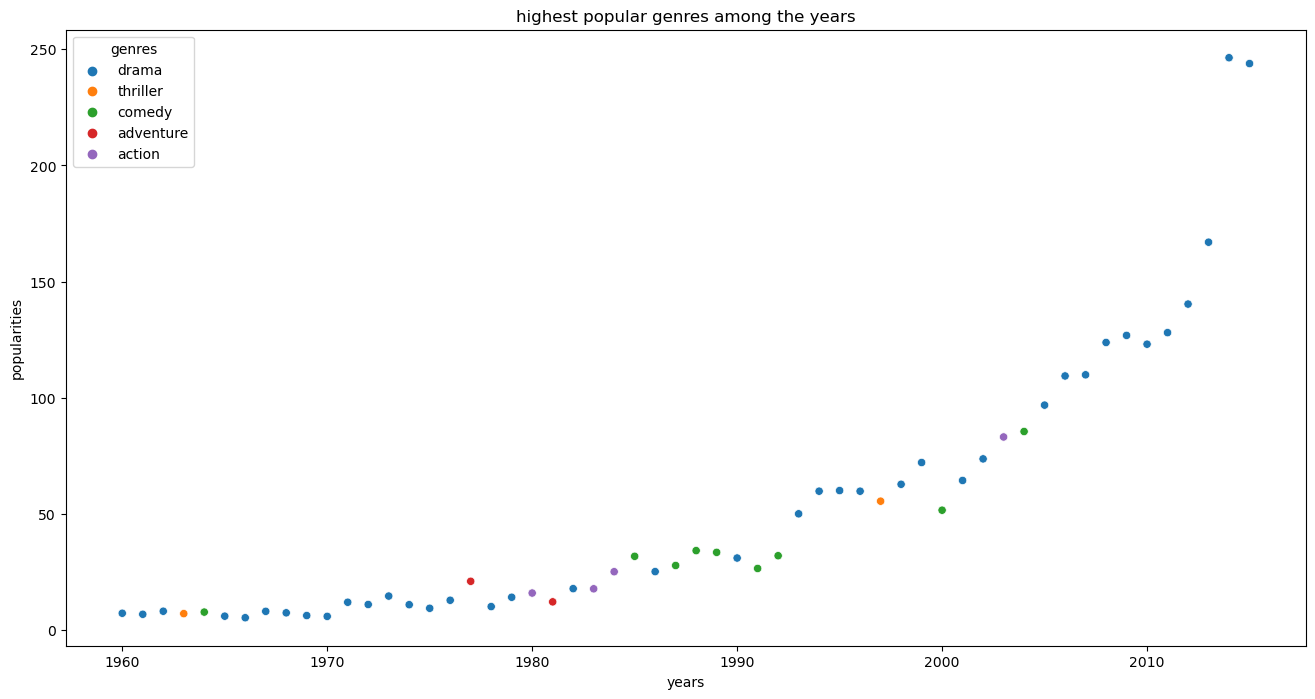

In [49]:
#gen_pop_d.plot(kind='bar',x='years',y='popularities')
plt.rcParams['figure.figsize']=(16,8)
sns.scatterplot(x='years',y='popularities',hue='genres',data=gen_pop_d)
plt.title('highest popular genres among the years')
plt.show()


#### This dataset has some limitations : 
* There is more than 5000 rows with Zeros(0) as values in some features (the revenues and budget).
* There is no currency normalization in this dataset The Revenue is just numerical value even if we can consider that they are in US Dollar due to the fact that we know these movies are Hollywood production movies
* Knowing that there is many missing values the accuracy in the analysis can be questionned if we use these features.in the analysis

<a id='conclu'></a>
## Conclusion
------

We can see that the most popular genre by year to year is the DRAMA genre ,follows by the COMEDY genre and ACTION and then ADVENTURE
We can also say that throughout this analysis the drama genre is popular along the year.
All of this analysis could be more accurate if we had have a few or no nulls in the dataset 
the conclusion i've come into the analyse of the relation between the genre over the year is productions compagny might want to produces the genres that are the most popular due to several reason that i didnt try to find out but could be interesting to look at like maybe the revenues in these movies genres are more important because the public like these movie and so they are more likely to have succesful films if they produce these movies genre.

# Citation

The online documentations of pandas, numpy, and matplotlib and seaborn .
Thanks go to the Pandas.PyData website for helping me understand most of the functions usedin the report  and to the stackoverflow.com website.